<br><br>
<font size = "6">
<b>Artificial Neural Networks (ANN) - Advanced</b>
</font><br><br>

<br>
<div class=pull-right>
By Prof. Sooyoung Lee<br>
http://iai.cau.ac.kr/<br>
Industrial AI Lab at Chung-Ang University
</div>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 1. Ovefitting in Regression

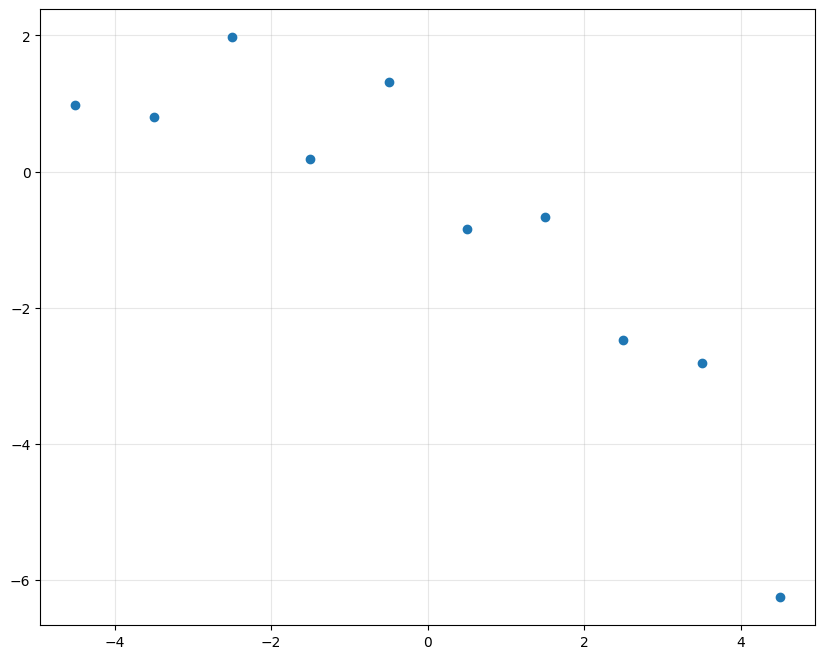

In [ ]:
N = 10
data_x = np.linspace(-4.5, 4.5, N)
data_y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512])

data_x = data_x.reshape(-1,1)
data_y = data_y.reshape(-1,1)

plt.figure(figsize = (10,8))
plt.plot(data_x, data_y, 'o')
plt.grid(alpha = 0.3)
plt.show()

In [ ]:
base_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 30, activation = 'sigmoid', input_shape = (1,)),
    tf.keras.layers.Dense(units = 100, activation = 'sigmoid'),
    tf.keras.layers.Dense(units = 100, activation = 'sigmoid'),
    tf.keras.layers.Dense(units = 30, activation = 'sigmoid'),
    tf.keras.layers.Dense(units = 1, activation = None)
])

In [ ]:
base_model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                   loss = 'mse',
                   metrics = ['mse'])

4/4 [==============================] - 0s 2ms/step


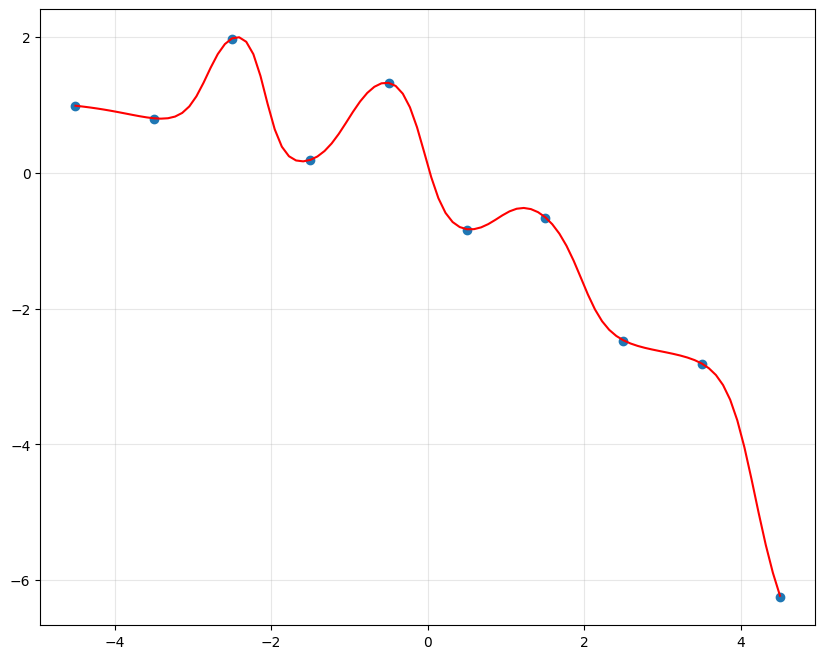

In [ ]:
# Train Model & Evaluate Test Data

training = base_model.fit(data_x, data_y, epochs = 5000, verbose = 0)

xp = np.linspace(-4.5, 4.5, 100).reshape(-1,1)
my_pred = base_model.predict(xp)

plt.figure(figsize = (10,8))
plt.plot(data_x, data_y, 'o')
plt.plot(xp, my_pred, 'r')
plt.grid(alpha = 0.3)
plt.show()

# 2. Batch Normalization

In [ ]:
bn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 30, activation = None, input_shape = (1,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('sigmoid'),
    tf.keras.layers.Dense(units = 100, activation = None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('sigmoid'),
    tf.keras.layers.Dense(units = 100, activation = None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('sigmoid'),
    tf.keras.layers.Dense(units = 30, activation = None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('sigmoid'),
    tf.keras.layers.Dense(units = 1, activation = None)
])

In [ ]:
bn_model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                 loss = 'mse',
                 metrics = ['mse'])

4/4 [==============================] - 0s 3ms/step


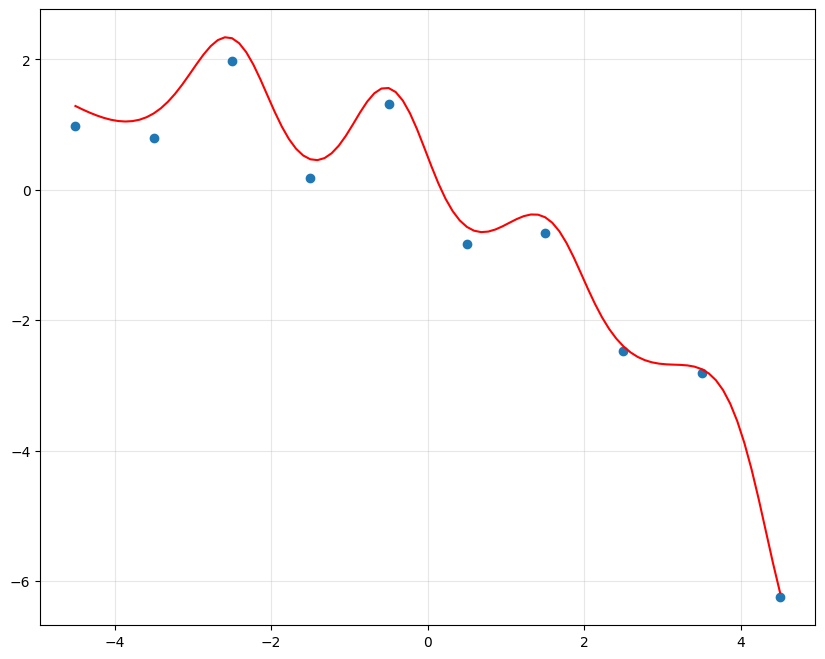

In [ ]:
training = bn_model.fit(data_x, data_y, epochs = 4000, verbose = 0)

xp = np.linspace(-4.5, 4.5, 100).reshape(-1,1)
my_pred = bn_model.predict(xp)

plt.figure(figsize = (10,8))
plt.plot(data_x, data_y, 'o')
plt.plot(xp, my_pred, 'r')
plt.grid(alpha = 0.3)
plt.show()

# 3. Dropout

In [ ]:
dropout_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 30, activation = 'sigmoid', input_shape = (1,)),
    tf.keras.layers.Dropout(rate = 0.2),
    tf.keras.layers.Dense(units = 100, activation = 'sigmoid'),
    tf.keras.layers.Dropout(rate = 0.2),
    tf.keras.layers.Dense(units = 100, activation = 'sigmoid'),
    tf.keras.layers.Dropout(rate = 0.2),
    tf.keras.layers.Dense(units = 30, activation = 'sigmoid'),
    tf.keras.layers.Dropout(rate = 0.2),
    tf.keras.layers.Dense(units = 1, activation = None)
])

In [ ]:
dropout_model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                      loss = 'mse',
                      metrics = ['mse'])

4/4 [==============================] - 0s 2ms/step


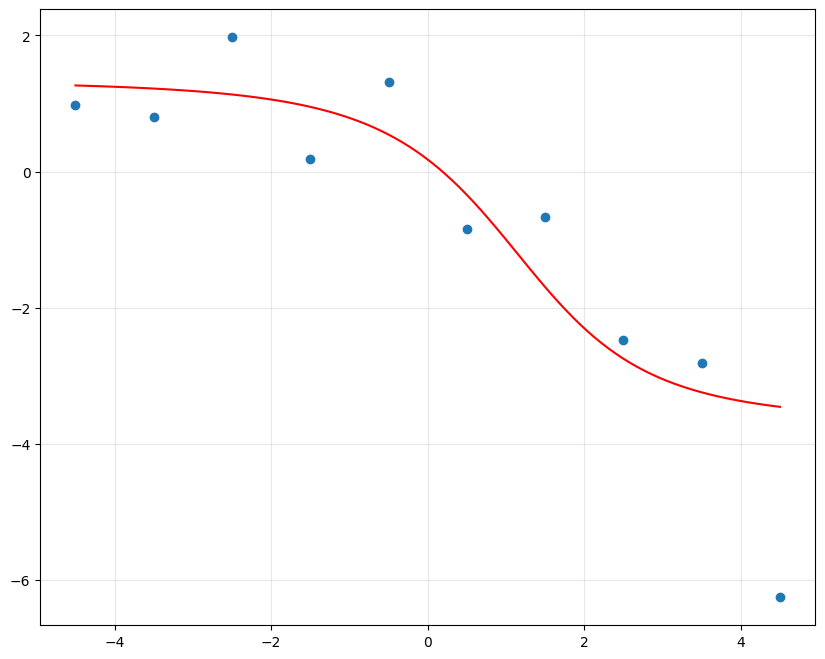

In [ ]:
training = dropout_model.fit(data_x, data_y, epochs = 200, verbose = 0)

xp = np.linspace(-4.5, 4.5, 100).reshape(-1,1)
my_pred = dropout_model.predict(xp)

plt.figure(figsize = (10,8))
plt.plot(data_x, data_y, 'o')
plt.plot(xp, my_pred, 'r')
plt.grid(alpha = 0.3)
plt.show()

# 4. ANN with PyTorch

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [ ]:
mnist_train = dsets.MNIST(root="MNIST_data/", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root="MNIST_data/", train=False, transform=transforms.ToTensor(), download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 100203443.24it/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 41570244.96it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27837270.15it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7167241.82it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



## 4.1. Data Loader

In [ ]:
from torch.utils.data import DataLoader## Import packages
data_loader = DataLoader(dataset=mnist_train,
                        batch_size = 100,
                        shuffle=True,
                        drop_last=True)

## 4.2. Define Model

In [ ]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Linear(784,256),torch.nn.BatchNorm1d(256), torch.nn.ReLU(),
            torch.nn.Linear(256,128),torch.nn.BatchNorm1d(128), torch.nn.ReLU(),
            torch.nn.Linear(128,32),torch.nn.BatchNorm1d(32), torch.nn.ReLU(),
            torch.nn.Linear(32,10)
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
model = ANN()

## 4.3. Loss and Optimizer

In [ ]:
criterion = torch.nn.CrossEntropyLoss()    # Softmax is internally computed.
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

## 4.4. Train

In [ ]:
training_epochs = 15

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28)
        Y = Y

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)## Import packages
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.754534364
Epoch: 0002 cost = 0.243519455
Epoch: 0003 cost = 0.154973939
Epoch: 0004 cost = 0.114785910
Epoch: 0005 cost = 0.090190567
Epoch: 0006 cost = 0.072919749
Epoch: 0007 cost = 0.059769318
Epoch: 0008 cost = 0.051759746
Epoch: 0009 cost = 0.042204294
Epoch: 0010 cost = 0.035817988
Epoch: 0011 cost = 0.032243188
Epoch: 0012 cost = 0.027335281
Epoch: 0013 cost = 0.023630267
Epoch: 0014 cost = 0.021053791
Epoch: 0015 cost = 0.018220788
Learning finished


## 4.5. Test

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.6396999955177307
Label:  0
Prediction:  0


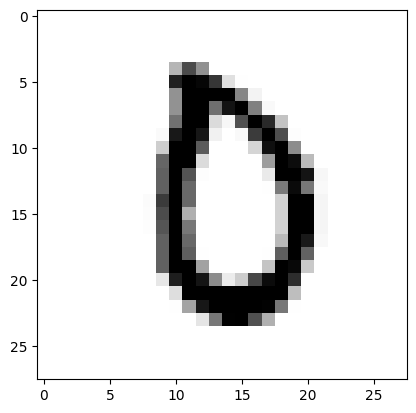

In [ ]:
model.eval()
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float()
    Y_test = mnist_test.test_labels

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float()
    Y_single_data = mnist_test.test_labels[r:r + 1]

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

    # batch size 와 learing rate는 얽히고 섥힌 관계임